# Brief analysis of StudentsPerformance dataset

This notebook is intended to briefly analyze our dataset statistically, and provide some useful visualizations. This data should be useful for preprocessing and building of our machine learning models for the project.

Our project goal is classifiying students exam score performances, based on various input variables. We intend to do this by using different supervised learning classifiers, implemented with sklearn:

- Decision tree classifier
- Support vector classifier
- K nearest neighbor classifier
- Random forest classifier

Each of the methods have their advantages and disadvantages, and properties. It is therefore important to look at the data fiting for all models to maximize our accuracy. 

Thanks to user "kralmachine" on Kaggle for very nice seaborn tutorial: https://www.kaggle.com/kralmachine/seaborn-tutorial-for-beginners

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [7]:
#Reading the dataset into dataframe
df1 = pd.read_csv('StudentsPerformance.csv')

#Just renaming some columns for ease:
df1.rename(columns={'parental level of education': 'parent edu', 'test preparation course': 'prep course'}, inplace=True)

df1.head()

,gender,race/ethnicity,parent edu,lunch,prep course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
#Since we are going to use a combined score, let us make another dataframe which has the mean of the three scores as one:
df2 = pd.read_csv('StudentsPerformance.csv')

avg_score = []
for row in df2.itertuples():
    score = (row._6 + row._7 + row._8) / 3
    score = np.round(score, 3)
    avg_score.append(score)

del df2['math score']
del df2['reading score']
del df2['writing score']
df2['score'] = avg_score

df2.rename(columns={'parental level of education': 'parent edu', 'test preparation course': 'prep course'}, inplace=True)
df2.head()


,gender,race/ethnicity,parent edu,lunch,prep course,score
0,female,group B,bachelor's degree,standard,none,72.667
1,female,group C,some college,standard,completed,82.333
2,female,group B,master's degree,standard,none,92.667
3,male,group A,associate's degree,free/reduced,none,49.333
4,male,group C,some college,standard,none,76.333


In [24]:
# Dimensions of dataframe:
print(df1.shape)
print(df2.shape)

(1000, 8)
(1000, 6)


## General

We can use built in pandas functions to find some general information about the data. 

In [14]:
df1.describe(include='all') #Generate descriptive statistics

,gender,race/ethnicity,parent edu,lunch,prep course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [15]:
df2.describe(include='all') #Generate descriptive statistics

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score
count,1000,1000,1000,1000,1000,1000.000000
unique,2,5,6,2,2,NaN
top,female,group C,some college,standard,none,NaN
freq,518,319,226,645,642,NaN
mean,NaN,NaN,NaN,NaN,NaN,67.770658
std,NaN,NaN,NaN,NaN,NaN,14.257324
min,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,NaN,NaN,NaN,NaN,58.333000
50%,NaN,NaN,NaN,NaN,NaN,68.333000
75%,NaN,NaN,NaN,NaN,NaN,77.667000


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          1000 non-null   object
 1   race/ethnicity  1000 non-null   object
 2   parent edu      1000 non-null   object
 3   lunch           1000 non-null   object
 4   prep course     1000 non-null   object
 5   math score      1000 non-null   int64 
 6   reading score   1000 non-null   int64 
 7   writing score   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   score                        1000 non-null   float64
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [25]:
df1.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000




## Visualizations

Look at distributions in the dataset:

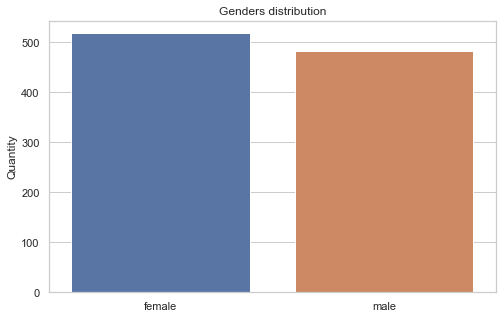

In [38]:
# Gender distribution:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.barplot(x=df1['gender'].value_counts().index, y=df1['gender'].value_counts().values)
#sns.countplot(df1['gender'])


plt.title('Genders distribution')
plt.ylabel('Quantity')
plt.show()

As seen above, the distribution of genders in the dataset is rather balanced, close to 50-50. 

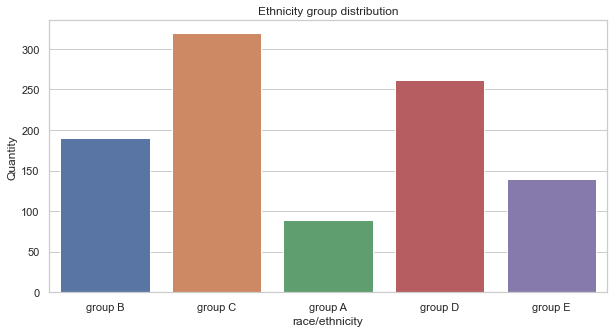

In [41]:
# Distribution of race/ethnicity groups
plt.figure(figsize=(10,5))

sns.countplot(df1['race/ethnicity'])
plt.title('Ethnicity group distribution')
plt.ylabel('Quantity')
plt.show()

Groups C and D are overrepresented in the dataset.

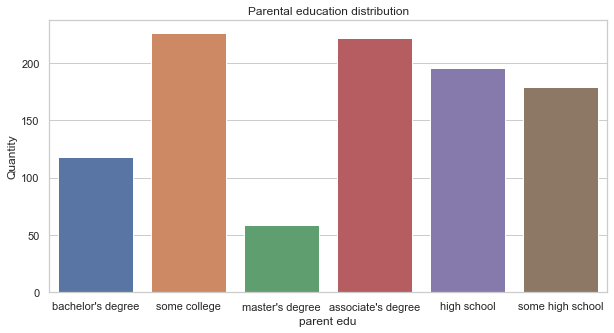

In [43]:
plt.figure(figsize=(10,5))

sns.countplot(df1['parent edu'])
plt.title('Parental education distribution')
plt.ylabel('Quantity')
plt.show()

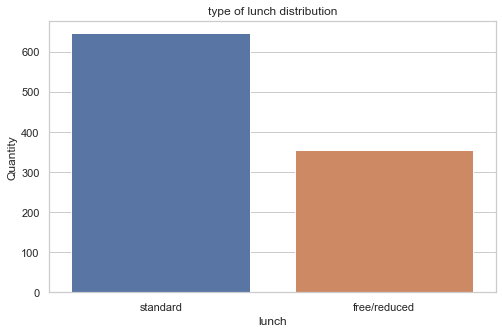

In [45]:
plt.figure(figsize=(8,5))

sns.countplot(df1['lunch'])
plt.title('type of lunch distribution')
plt.ylabel('Quantity')
plt.show()

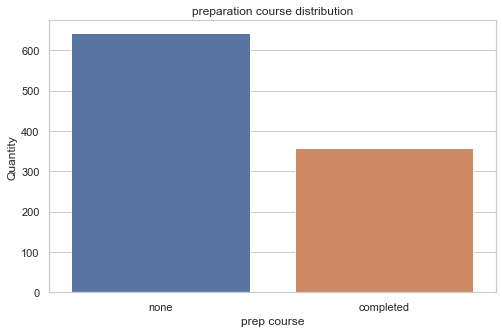

In [47]:
plt.figure(figsize=(8,5))

sns.countplot(df1['prep course'])
plt.title('preparation course distribution')
plt.ylabel('Quantity')
plt.show()

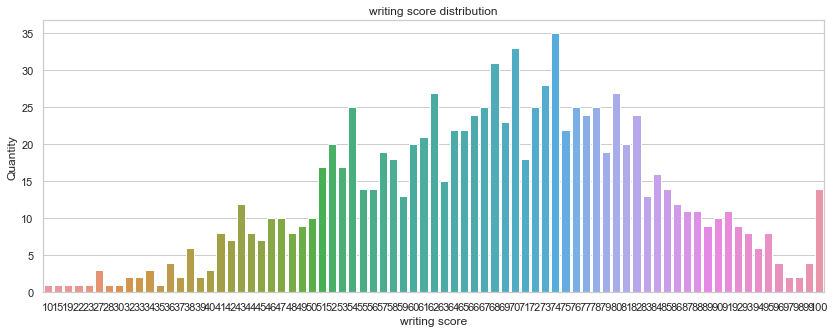

In [49]:
# Scores. Look at the three individual, then how the average distribution compares

plt.figure(figsize=(14,5))

sns.countplot(df1['writing score'])
plt.title('writing score distribution')
plt.ylabel('Quantity')
plt.show()

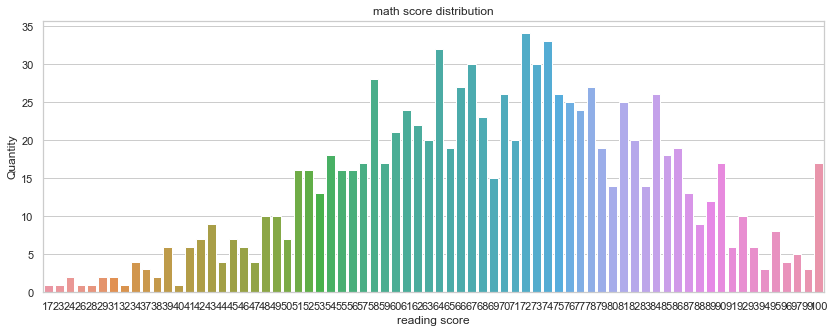

In [55]:
plt.figure(figsize=(14,5))

sns.countplot(df1['reading score'])
plt.title('math score distribution')
plt.ylabel('Quantity')
plt.show()

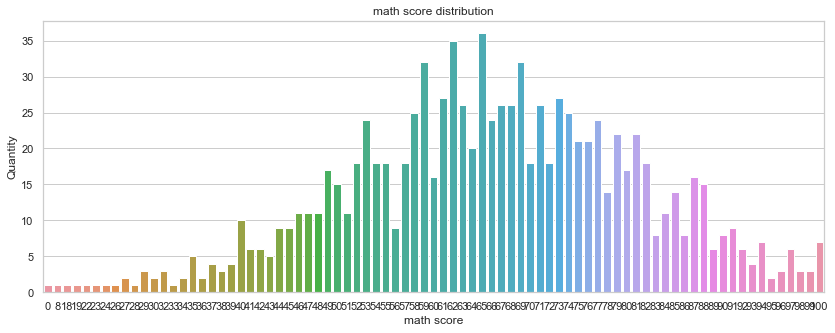

In [56]:
plt.figure(figsize=(14,5))

sns.countplot(df1['math score'])
plt.title('math score distribution')
plt.ylabel('Quantity')
plt.show()

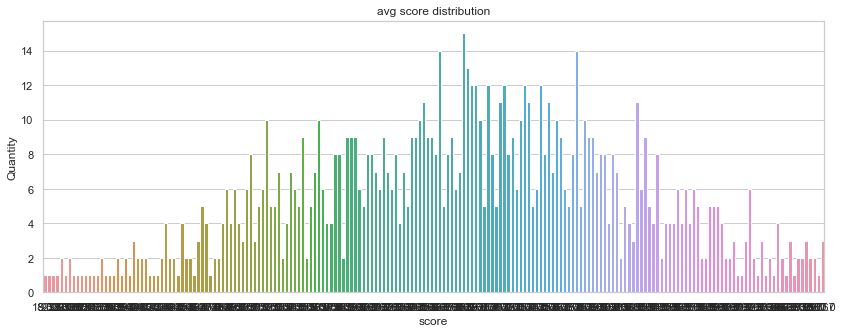

In [57]:
plt.figure(figsize=(14,5))

sns.countplot(df2['score'])
plt.title('avg score distribution')
plt.ylabel('Quantity')
plt.show()

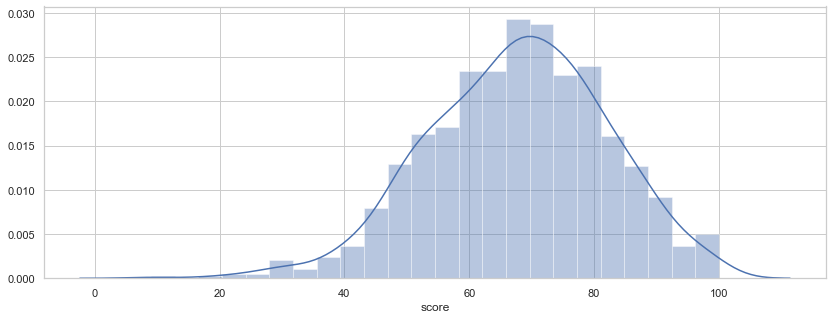

In [64]:
# With distplots:
plt.figure(figsize=(14,5))
#ax = sns.distplot(df1['math score'])
#ax = sns.distplot(df1['writing score'])
#ax = sns.distplot(df1['reading score'])
ax = sns.distplot(df2['score'])
plt.show()


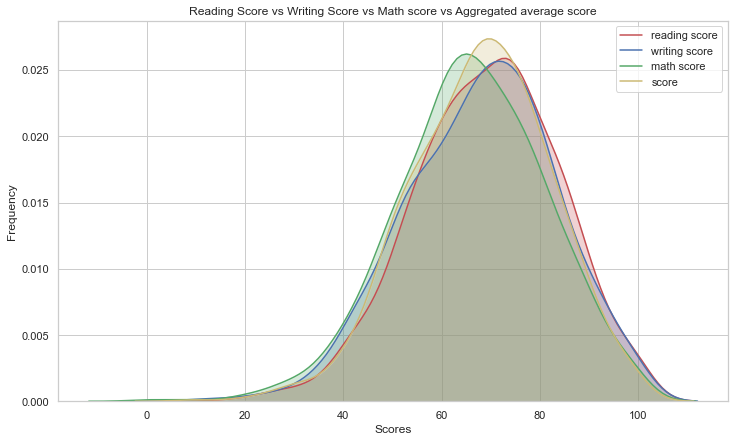

In [58]:
#The comparisons are better visualized here:

plt.figure(figsize=(12,7))

sns.kdeplot(df1['reading score'],shade=True,color='r')
sns.kdeplot(df1['writing score'],shade=True,color='b')
sns.kdeplot(df1['math score'],shade=True,color='g')
sns.kdeplot(df2['score'],shade=True,color='y')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Reading Score vs Writing Score vs Math score vs Aggregated average score')
plt.show()




More descriptive visualizations: